# Notebook for scraping UFC-stats pages

In [926]:
def display_img(src, description=None, is_src_url=False):
    from IPython.display import Image
    from IPython.core.display import HTML 
    if description is not None: print(description)
    if is_src_url:
        display(Image(url=src))
    else:
        display(Image(filename=src))

Start url:


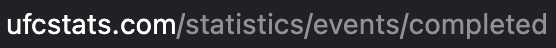

Second url:


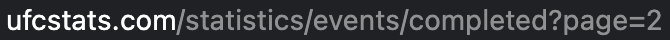

Last url:


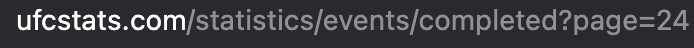

In [927]:
img_name_prefix = ["start", "second", "last"]
for prefix in img_name_prefix:
    display_img(src=f"img/front page urls/{prefix}_url.png", 
                description=f"{prefix.capitalize()} url:")

## As we can see above, pattern of ufc stats urls is clear:
 - First page has unique url suffix pattern:
      - Page &emsp;1: '.../completed'
 - The rest of urls have a clear suffix pattern: 
     - Page &emsp;2: '.../completed**?page=2**'
     - Page &emsp;3: '.../completed**?page=3**'
     - ...
     - Page &ensp;24: '.../completed**?page=24**'

Front page:


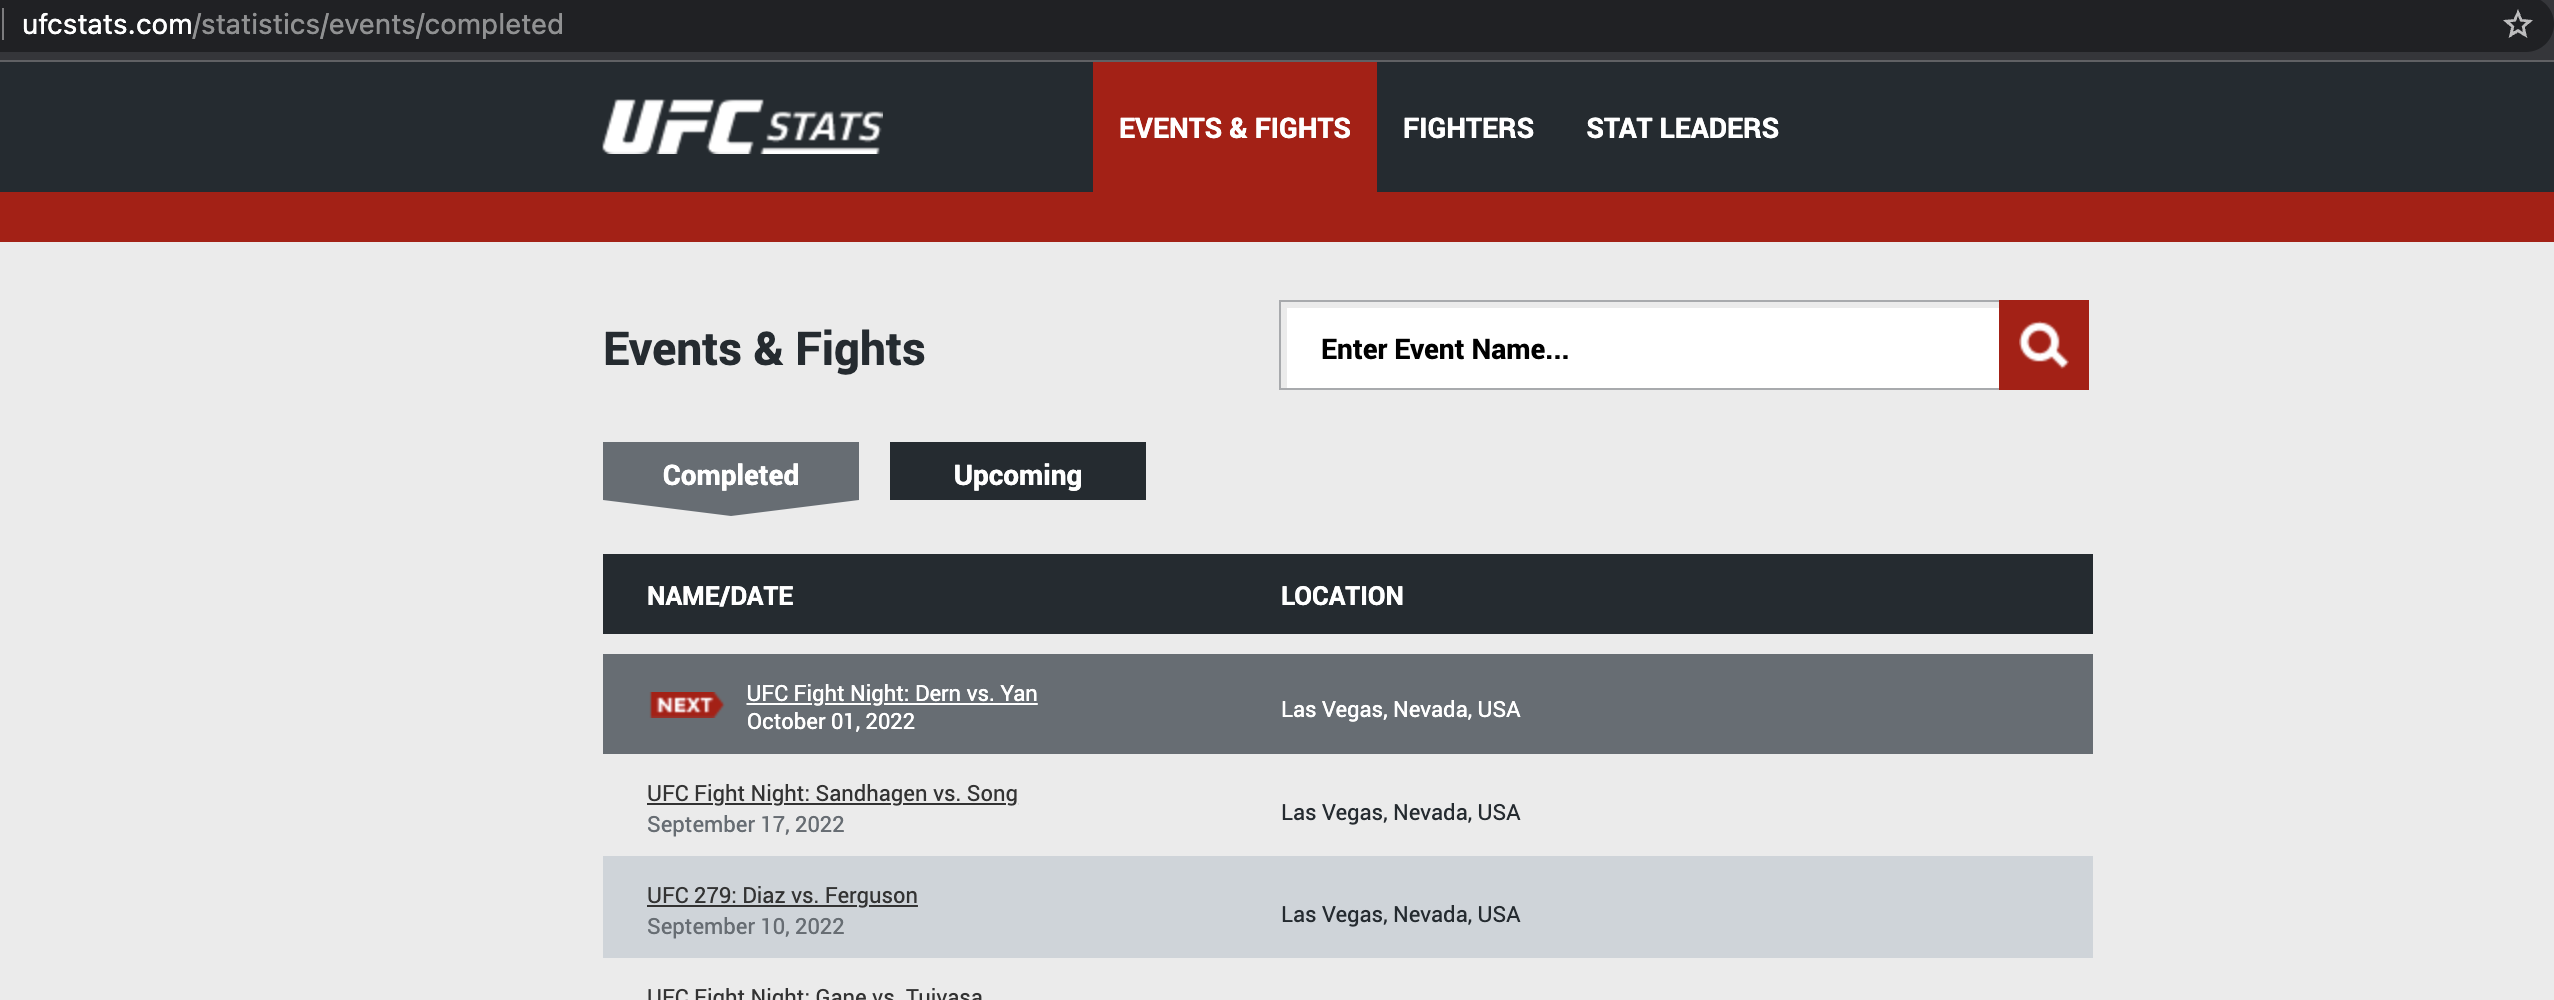

In [928]:
front_page_img_name = "front page"
display_img(src=f"img/front page/{front_page_img_name}.png", 
            description="Front page:")

In [929]:
def get_ufc_front_pages_urls():
    import requests

    sfx_ptrn = "?page="
    suffixes = [''] # initially only 1 element - empty string, because of the unique start
    suffixes += [sfx_ptrn + str(i) for i in range(2, 25)] # 
    # print(suffixes)
    url_start = "http://ufcstats.com/statistics/events/completed{}" # notice {} at the end

    urls = []
    
    for i, sfx in enumerate(suffixes):
        urls.append(url_start.format(sfx))

    return urls

In [930]:
front_pages_urls = get_ufc_front_pages_urls()
front_pages_urls;

## Let's extract all links of events

Events page:


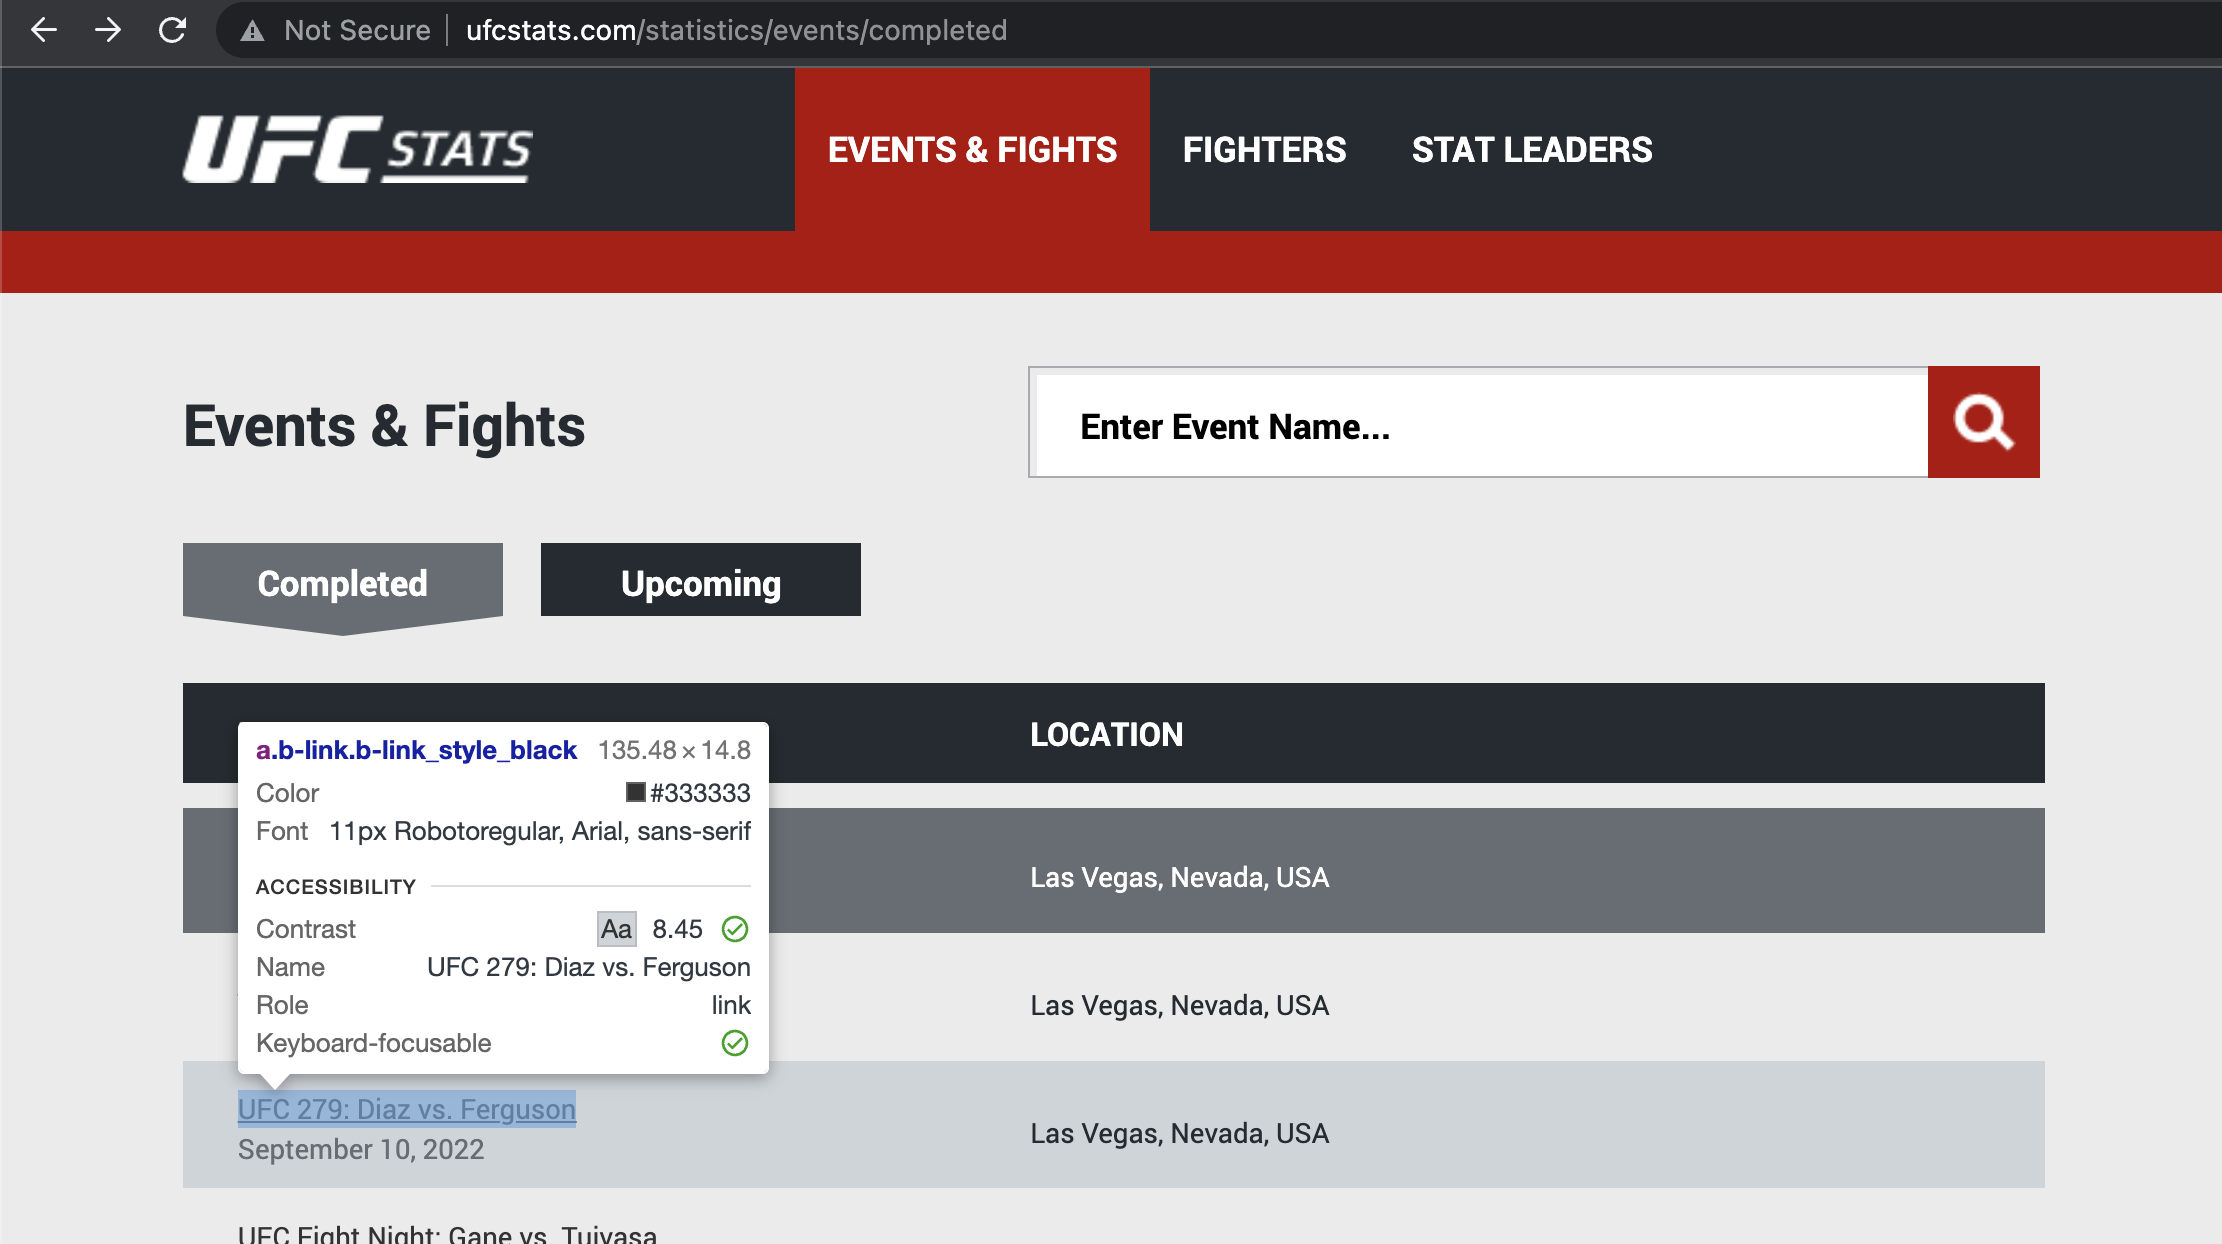

Event link:


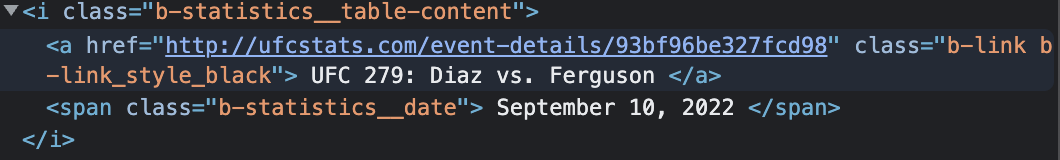

In [931]:
event_img_names = ["events page", "event link"]

for img_name in event_img_names:
    display_img(src=f"img/events/{img_name}.png", 
                description=f"{img_name.capitalize()}:")

In [932]:
# gets all events links from particular page
def get_events_links(page_url):
    from bs4 import BeautifulSoup
    
    page = requests.get(page_url).text
    soup = BeautifulSoup(page, "html.parser")
    tags_with_events_links = soup.find_all('a', class_="b-link b-link_style_black")
    events_links = [i['href'] for i in tags_with_events_links]
    
    return events_links

In [933]:
page_event_links_list = [get_events_links(front_page_url) for front_page_url in front_pages_urls]

In [934]:
'''
import numpy as np

flattened_events_links = np.concatenate(link_lists, axis=0, dtype="object")
flattened_events_links.shape
''';

## We expect links to contain 24 * 25 - 1 links
- 24 - number of pages
- 25 - number of links per page
- 1 &nbsp; - upcoming event on October 10th

In [935]:
assert(24*25 - 1 == sum((len(links) for links in page_event_links_list)))

# Every event link points to page with that kind of table:

Fights of event:


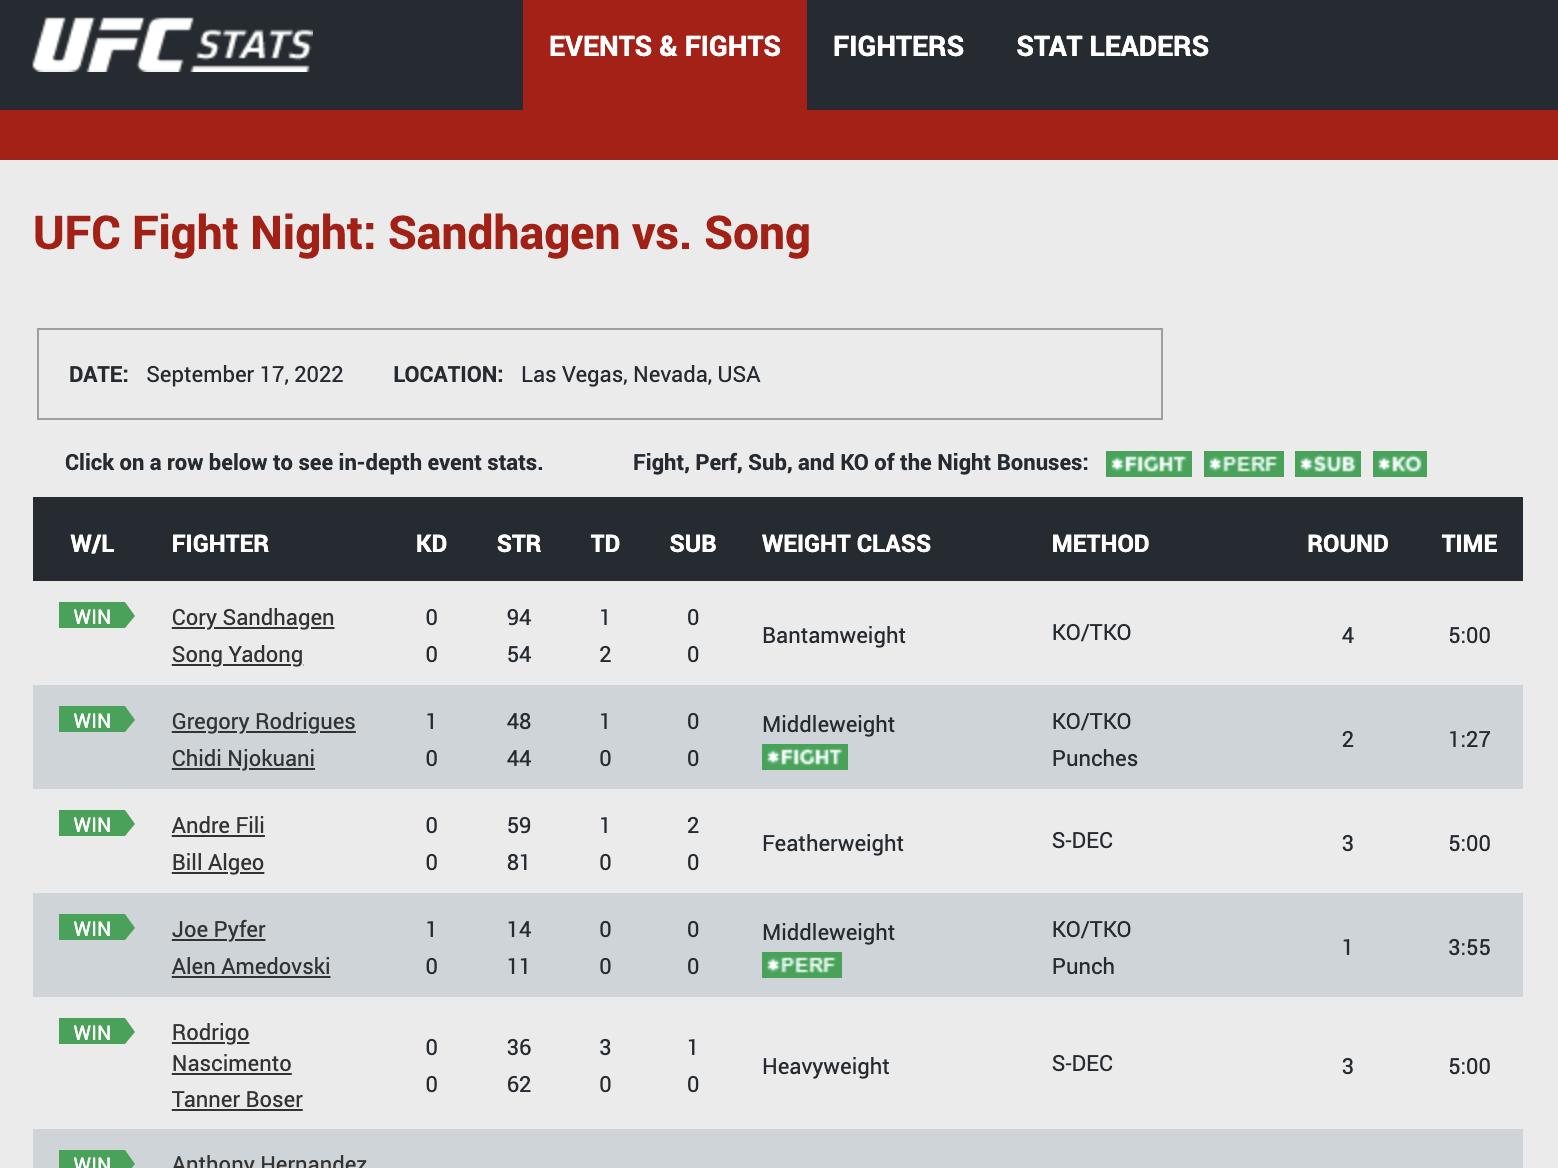

In [936]:
display_img('img/events/event description.png', 'Fights of event:')

# Proceeding further by clicking on any row leads us to table with fight details:

Fight details:


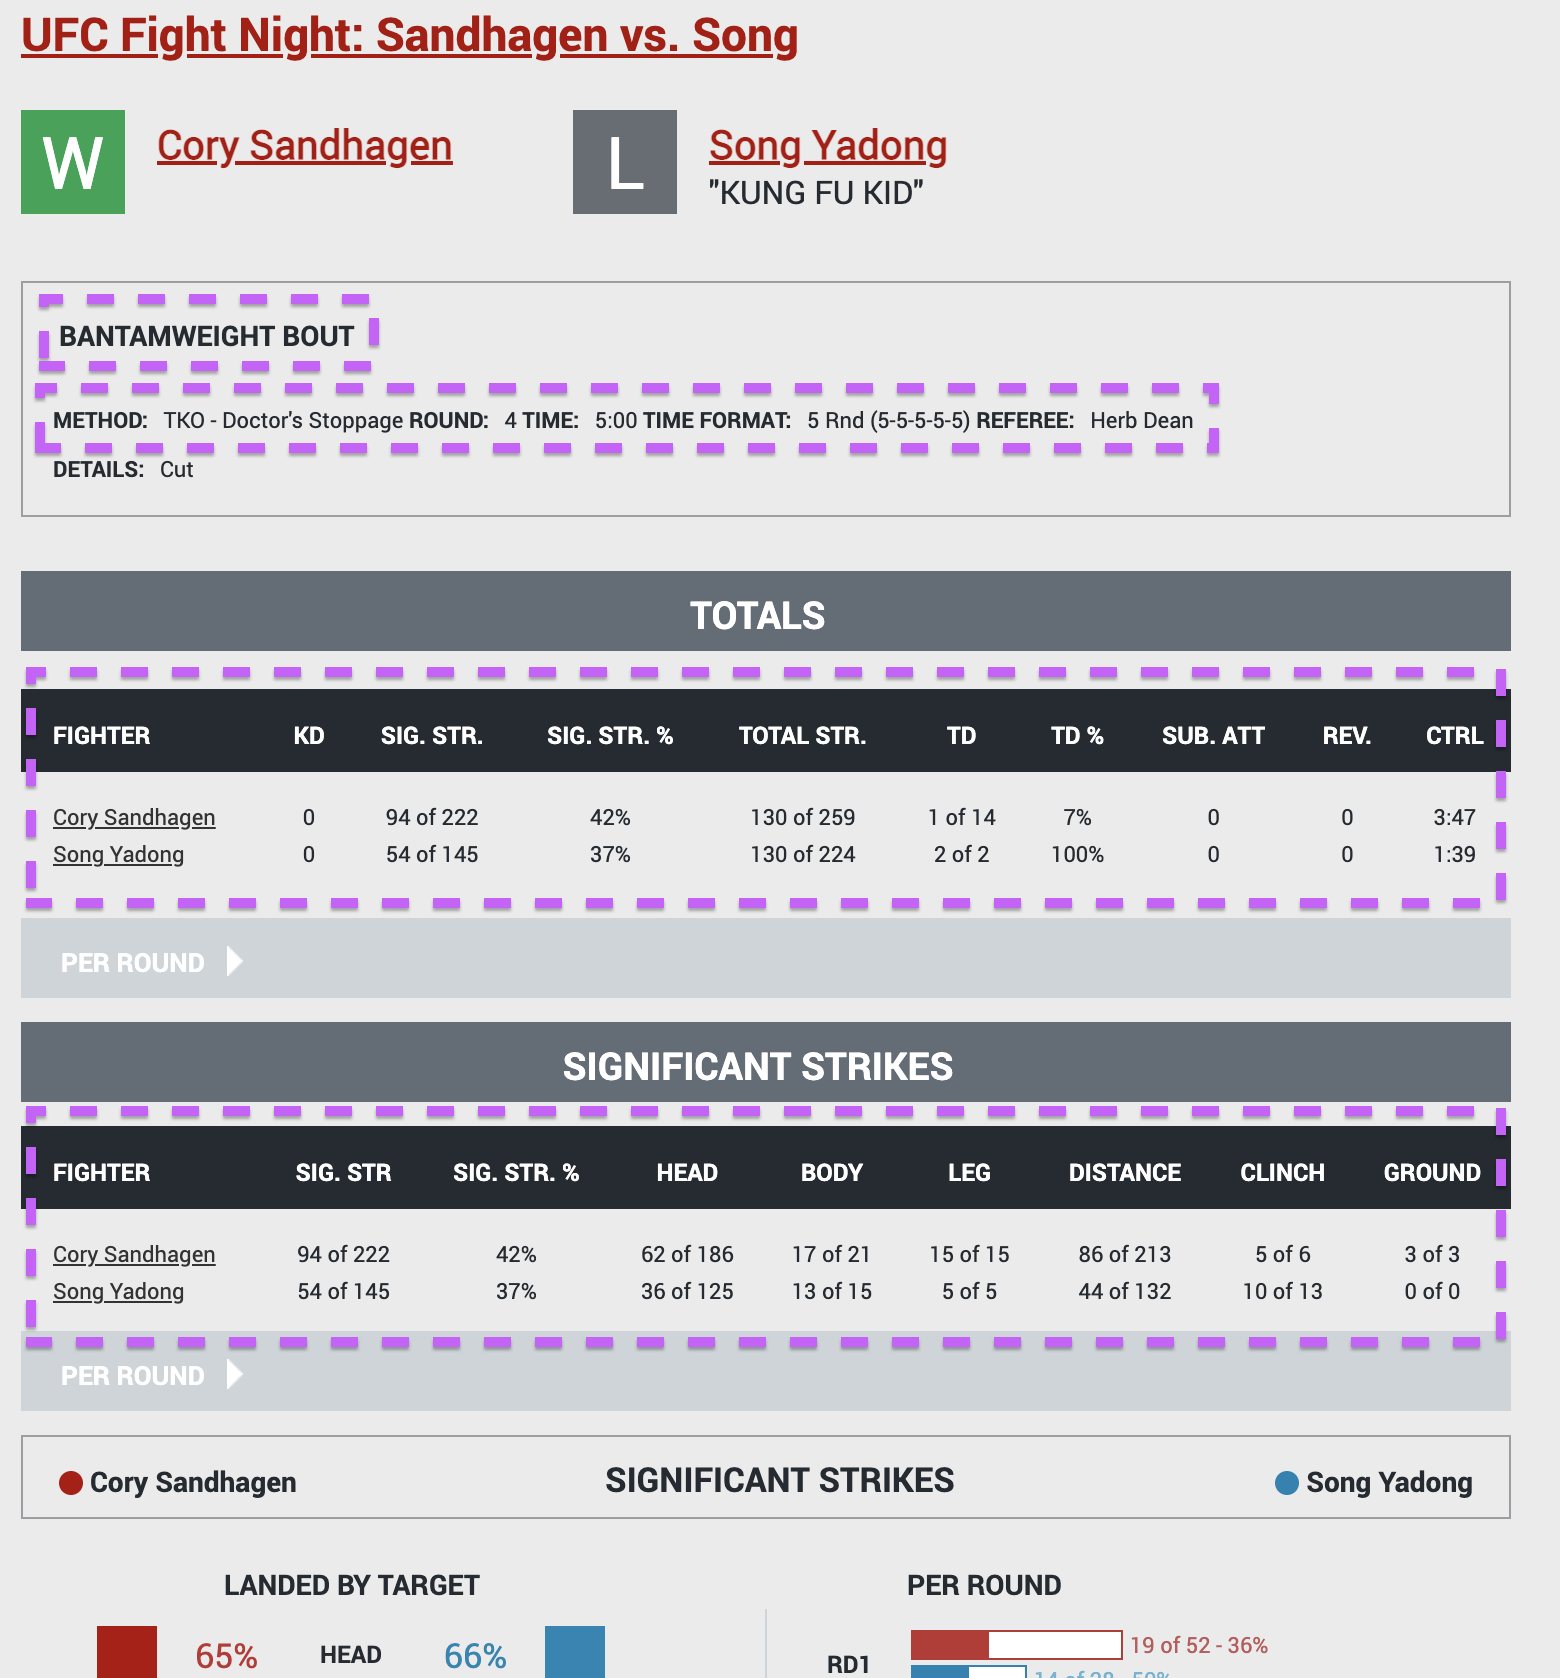

In [937]:
display_img('img/fights/fight info.png', 'Fight details:')

# Let's extract all links to fight tables above

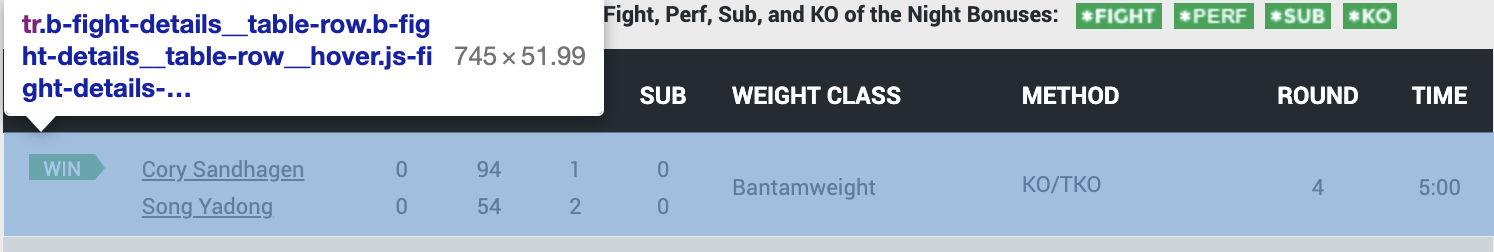

Link to fight table:


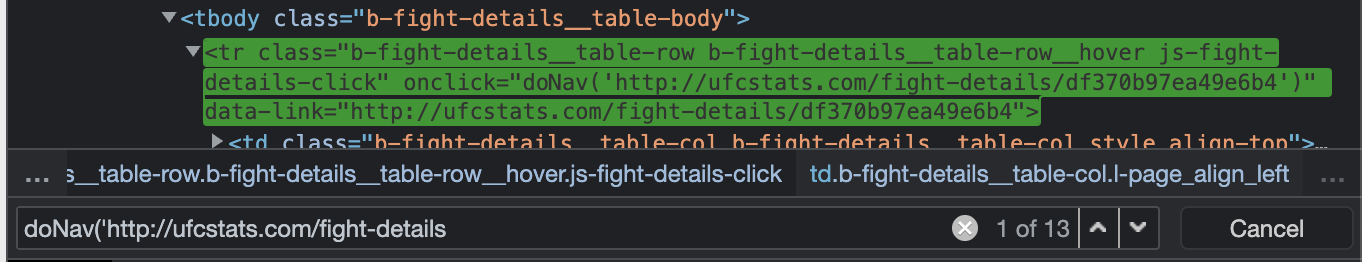

In [938]:
display_img('img/events/fight row.png', '')
display_img('img/events/fight link.png', 'Link to fight table:')

In [939]:
def get_links_to_tables(event_url):
    page = requests.get(event_url)
    soup = BeautifulSoup(page.text, 'html.parser')
    rows = soup.findAll('tr', class_="b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click")
    return [row['onclick'][7:-2] for row in rows]

In [940]:
def file_exists(file_path):
    import os.path
    return os.path.isfile(file_path) 

In [941]:
for page_idx, event_urls in enumerate(page_event_links_list):
    # print(f'Page_{page_idx}------------------------------------------------------------------------')
    file_path = file_path = f"tables/urls/page_{page_idx+1}"
    # if we already have table urls for page[page_idx], we don't want need to send requests again
    if file_exists(file_path) is False:
        for event_idx, event_url in enumerate(event_urls):
            # print("Event url:")
            # print(str(event))
            fight_table_urls = get_links_to_tables(event_url)
            for fight_table_url in fight_table_urls:
                with open(file_path, 'a') as f:
                    f.write(f'{fight_table_url}\n')
                    # print('writing:', f'{fight_table_url}')
    # print(f'Page_{page_idx} done!')

# Voila! Fight tables urls downloaded. Next step: scraping tables themselves and merging them into a csv file

In [942]:
display_img(is_src_url = True, src='https://images.unsplash.com/photo-1586542276867-832a2309a705?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2342&q=80')